# Fourier transforms in 2d
This notebook explores some properties of Fourier transforms that are relevant to this experiment.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# uncomment to make plots interactive
# %matplotlib notebook

## Explore some different inputs
These are some of the different possibilities that one might observe. The Gaussian (i.e. PSF) and fringes are the most relevant here.

To see the values in the FTs it will be best to execute the notebook, zoom in where necessary, and use the cursor to explore pixel values.

In [2]:
# set the image size to use below
nxy = 512

<IPython.core.display.Javascript object>


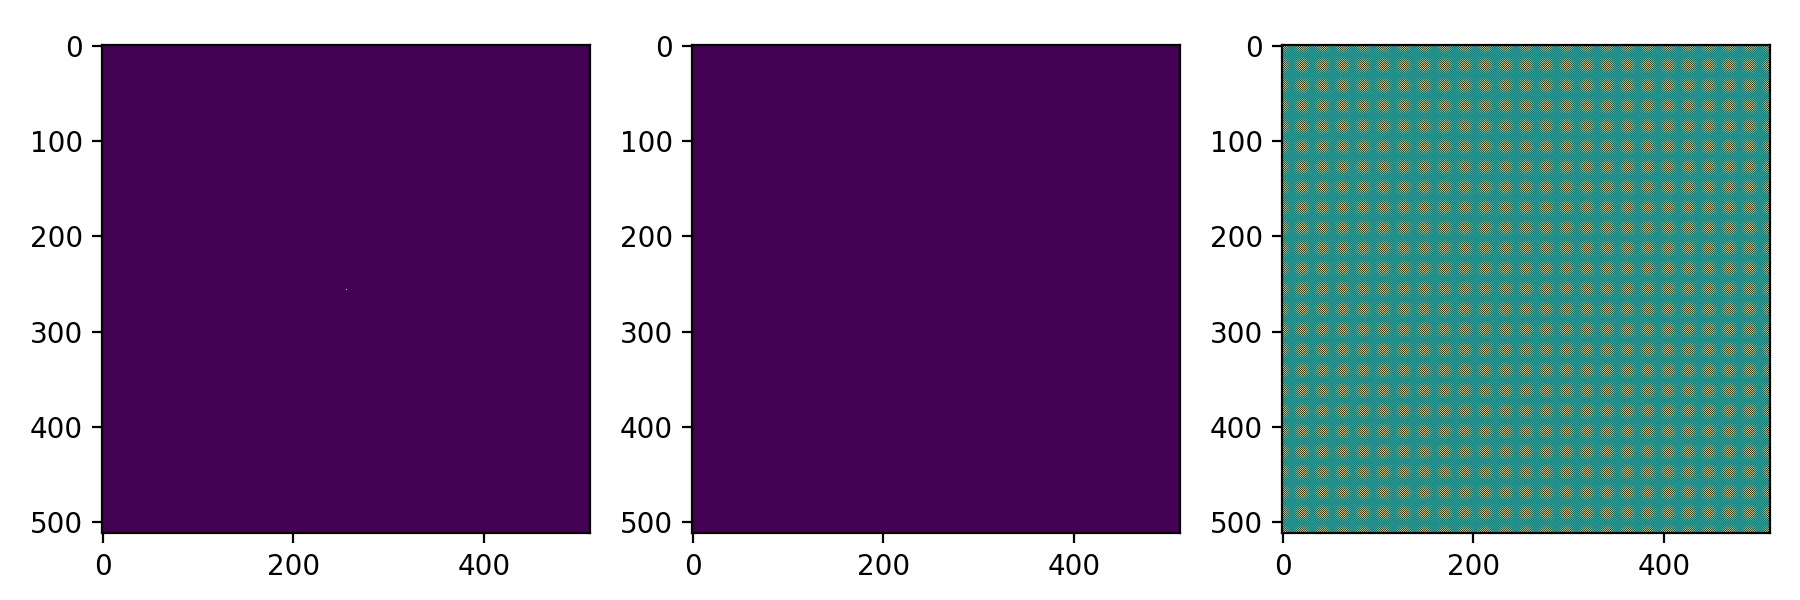

In [3]:
# delta function, FT is a constant of 1+0i for all frequencies
im = np.zeros((nxy,nxy))
im[nxy//2,nxy//2] = 1
ft = np.fft.fftshift(np.fft.fft2(im))

fig, ax = plt.subplots(1, 3, figsize=(9,3))
ax[0].imshow(im)
ax[1].imshow(np.abs(ft))
ax[2].imshow(np.angle(ft))
fig.tight_layout()

<IPython.core.display.Javascript object>


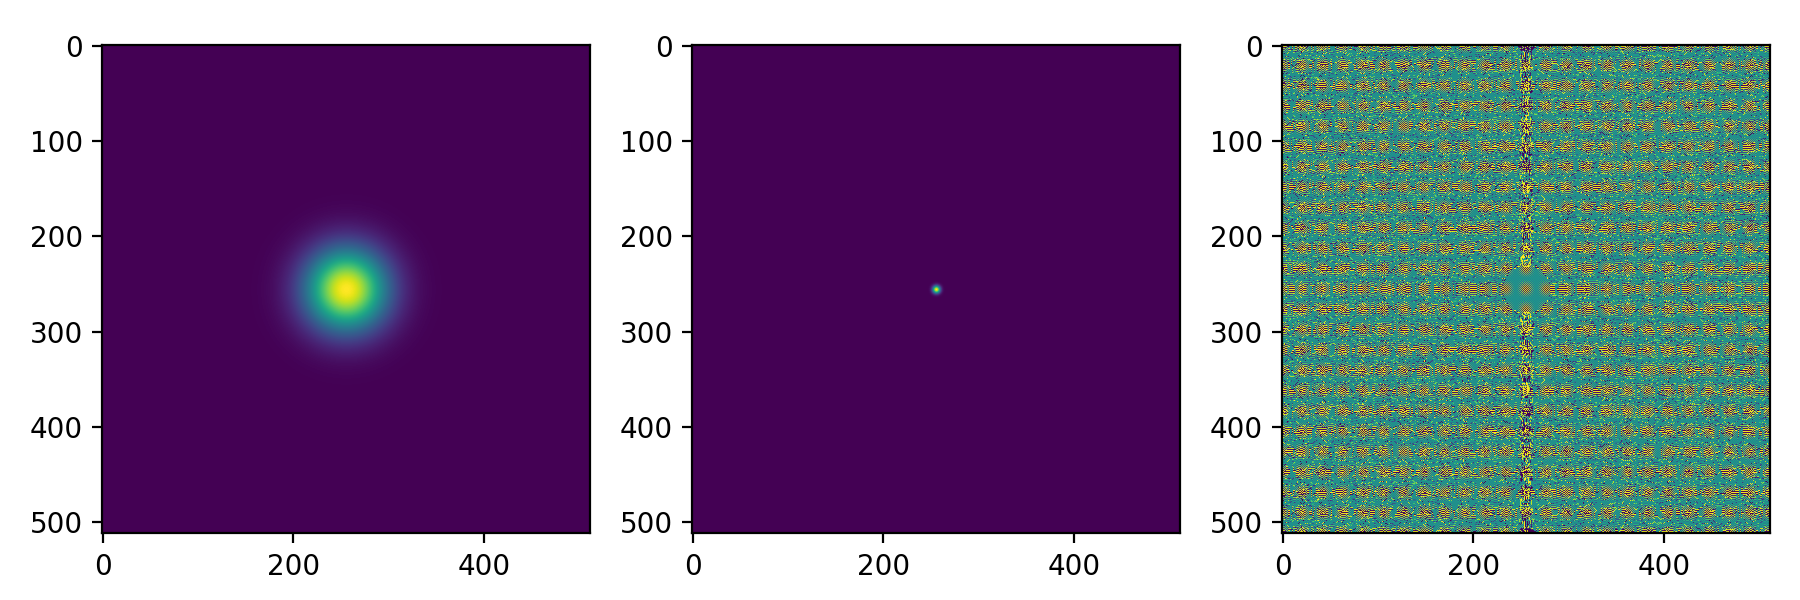

In [4]:
# Gaussian, this is a model of our PSF, FT is a Gaussian
def gauss(sigma, peak=1, xoff=0, yoff=0):
    xc = nxy/2 + xoff
    yc = nxy/2 + yoff
    x = np.arange(nxy) - xc
    y = np.arange(nxy) - yc
    xx, yy = np.meshgrid(x, y)
    r = np.sqrt( xx**2 + yy**2 )
    return peak * np.exp(-0.5 * (r/sigma)**2)

im_gauss = gauss(30)
ft = np.fft.fftshift(np.fft.fft2(im_gauss))

fig, ax = plt.subplots(1, 3, figsize=(9,3))
ax[0].imshow(im_gauss)
ax[1].imshow(np.abs(ft))
ax[2].imshow(np.angle(ft))
fig.tight_layout()

<IPython.core.display.Javascript object>


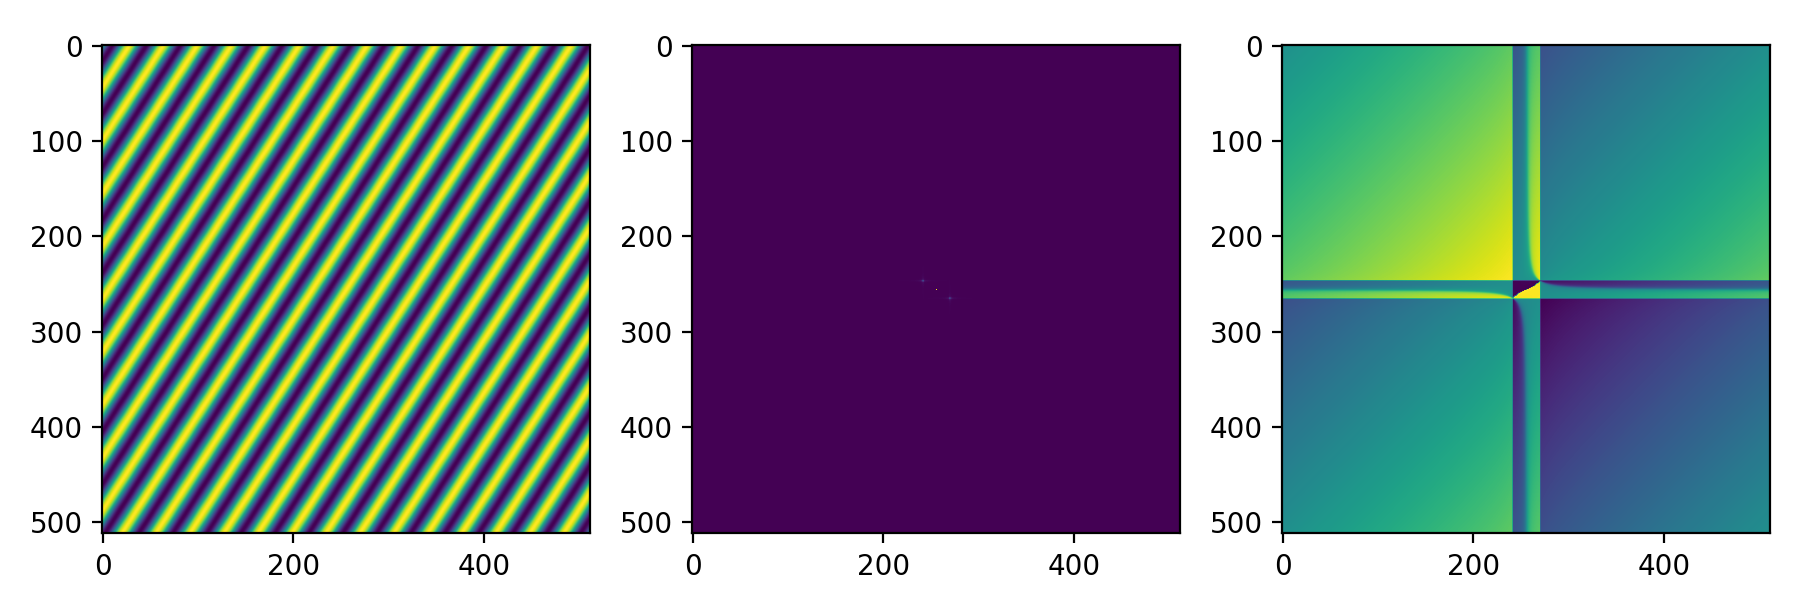

In [5]:
# fringes, FT is a peak at the frequency of the fringes
def fringes(wavel=30, angle=np.pi/3):
    xc = nxy/2
    yc = nxy/2
    x = np.arange(nxy) - xc
    y = np.arange(nxy) - yc
    xx, yy = np.meshgrid(x, y)
    return 0.5 * (( np.cos(2*np.pi*(xx*np.sin(angle) + yy*np.cos(angle))/wavel) ) + 1 )

im_fringe = fringes(wavel=30, angle=1)
ft = np.fft.fftshift(np.fft.fft2(im_fringe))

fig, ax = plt.subplots(1, 3, figsize=(9,3))
ax[0].imshow(im_fringe)
ax[1].imshow(np.abs(ft))
ax[2].imshow(np.angle(ft))
fig.tight_layout()

<IPython.core.display.Javascript object>


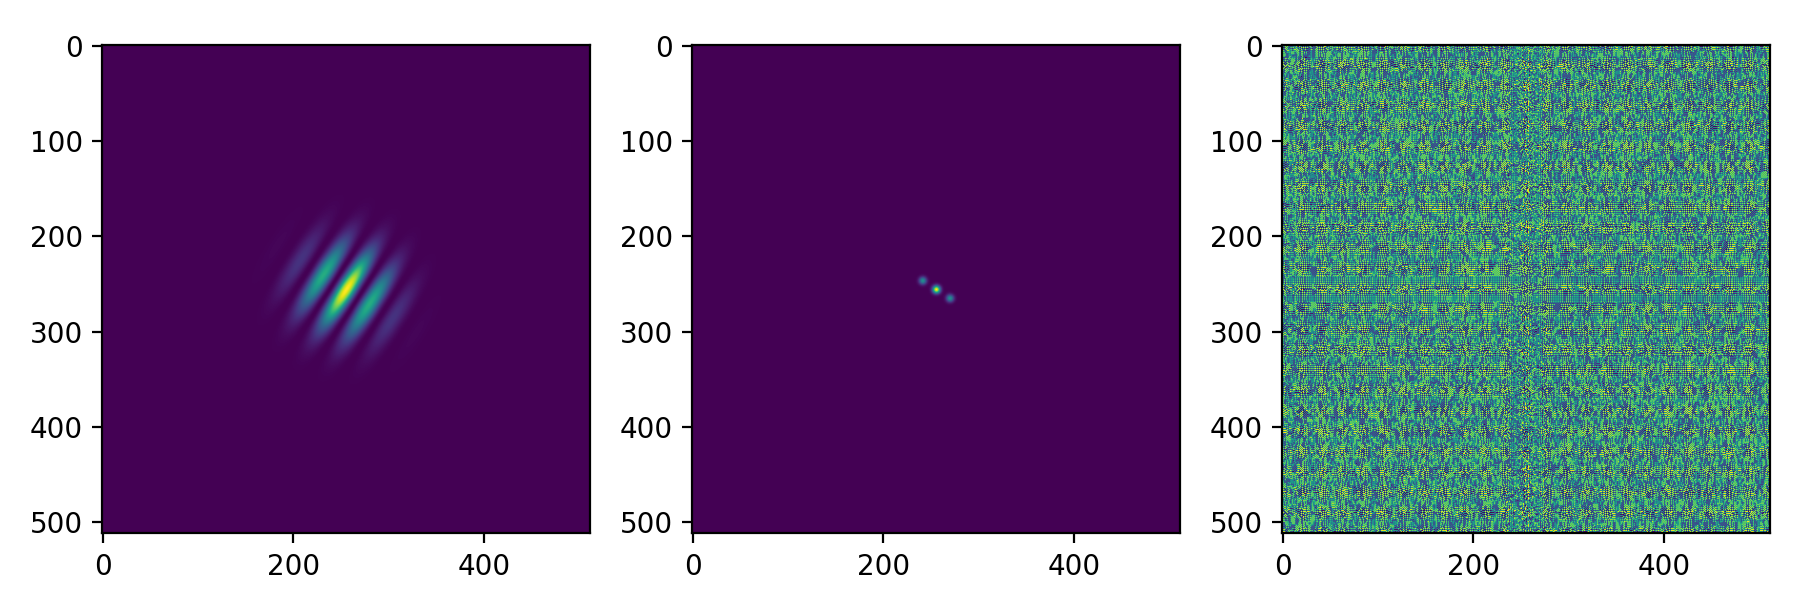

In [6]:
# fringes + psf
im = im_gauss * im_fringe

ft = np.fft.fftshift(np.fft.fft2(im))

fig, ax = plt.subplots(1, 3, figsize=(9,3))
ax[0].imshow(im)
ax[1].imshow(np.abs(ft)/np.max(np.abs(ft)))
ax[2].imshow(np.angle(ft))
fig.tight_layout()

In the panels above we have the simulated fringe pattern plus the PSF, combined such that the image is exactly like the data from the experiment. The FT (second panel) is scaled to the peak in the center (low frequency, which corresponds to the PSF), and the two sceondary peak values (which are the same) when multiplied by two are equal to the visibility.

Even here the visiblity values are slightly below 1. This can be shown to be due to the finite image size. Increasing the image size will increase the visibility.

## Inverse FT
Explore what an image for an FT similar to above looks like. Try a few things:

- Change the width of the components, e.g. width=0.2
- Turn off the PSF component and leave the two fringe components
- Leave only one PSF component turned on
- Combinations of the above

You will find that the main conclusion is that the shape of the image depends on the width of the components in the FT, and that the normalisation (i.e. making the image all positive) depends on the PSF component. The finite width of the fringe components in the FT dictates how broad the fringe envelope is, but this must have the same width as the PSF component, otherwise they will not match in the resulting image.

<IPython.core.display.Javascript object>


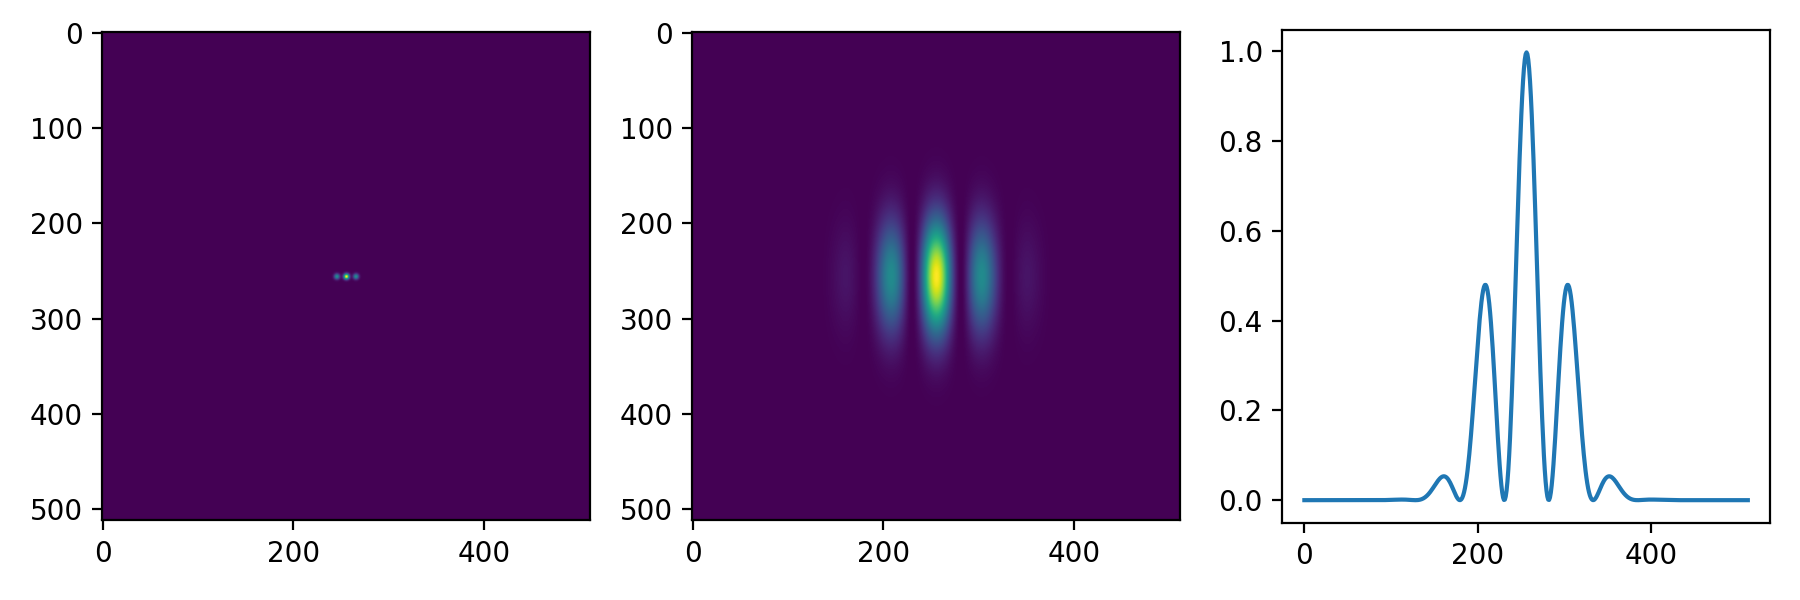

In [7]:
vis = 1
width = 2

vpk = vis / 2
ft =  gauss(width, peak=1)              # PSF
ft += gauss(width, xoff=10, peak=vpk)   # fringe
ft += gauss(width, xoff=-10, peak=vpk)  # fringe

im = np.fft.fftshift(np.fft.ifft2(np.fft.ifftshift(ft)))
im = np.real(im)
im /= np.max(np.abs(im))
cut = np.mean(im[nxy//2-5:nxy//2+5,:], axis=0)

fig, ax = plt.subplots(1, 3, figsize=(9,3))
ax[0].imshow(np.abs(ft))
ax[1].imshow(im)
ax[2].plot(cut)
fig.tight_layout()